In [4]:
import librosa
import soundfile
import os, glob
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lr

In [108]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, signal_wave , mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        signal_wave.append(X)
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            # print("mfcc ",mfccs.shape)
            result=np.hstack((result, mfccs[2:-2]))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
            # print("chroma ",chroma.shape)
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
            # print("mel ",mel.shape)
    return result

In [109]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

emotionstonumber={
    'fearful':0,
    'angry':1,
    'sad':2,
    'happy':3,
    'surprised':4
}


observed_emotions=['happy', 'fearful','sad','angry','surprised']

In [110]:
signal_wave=[]
path ="C:\\Users\\PunitSehrawat\\Desktop\\projects\\emotion priortizer\\speech_emotion\\Actor_*\\*.wav"
def load_data(test_size=0.2):
    x,y=[],[]

    for file in glob.glob(path):
        
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file,signal_wave, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [111]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

C:\Users\PunitSehrawat\AppData\Local\Temp\ipykernel_18240\576094630.py:19: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\PunitSehrawat\AppData\Local\Temp\ipykernel_18240\576094630.py:19: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\PunitSehrawat\AppData\Local\Temp\ipykernel_18240\576094630.py:19: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).

In [112]:
ran=[random.randrange(0,719) for i in range(5)] 

In [113]:
print(x_train.shape, x_test.shape,len(signal_wave))

(720, 176) (240, 176) 960


[14.80206776 11.67538357  9.40323353  2.82374239 -2.36773825 -2.71387291
 -2.96610832  5.06683969 -0.10634048  2.35976624  0.03993898  5.38959312
 -0.41506138  0.6310966   0.54425186  0.87881941 -3.97823238  0.50630087
 -1.46018183 -1.80161285  1.30312657  0.78855443 -0.89763552  0.7812047
 -0.64767373  0.77114046 -0.97265458  1.11262941 -1.37391233 -1.85253978
 -1.3708427  -0.20378122 -1.71681058 -1.81938779 -2.04805017 -0.93789726]


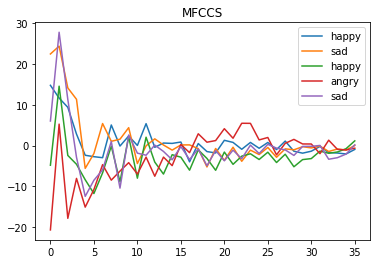

In [114]:
plt.title("MFCCS")
plt.plot(x_train[ran[0]][0:36],label=y_train[ran[0]])
plt.plot(x_train[ran[1]][0:36],label=y_train[ran[1]])
plt.plot(x_train[ran[2]][0:36],label=y_train[ran[2]])
plt.plot(x_train[ran[3]][0:36],label=y_train[ran[3]])
plt.plot(x_train[ran[4]][0:36],label=y_train[ran[4]])
plt.legend()
print(x_train[ran[0]][:36])

[0.64882904 0.66789812 0.7258991  0.68911576 0.65683198 0.68920386
 0.74401754 0.77248985 0.79093122 0.81809062 0.78249991]


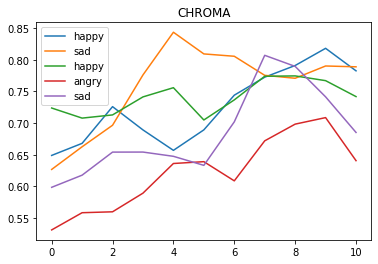

In [115]:
plt.title("CHROMA")
plt.plot(x_train[ran[0]][37:48],label=y_train[ran[0]])
plt.plot(x_train[ran[1]][37:48],label=y_train[ran[1]])
plt.plot(x_train[ran[2]][37:48],label=y_train[ran[2]])
plt.plot(x_train[ran[3]][37:48],label=y_train[ran[3]])
plt.plot(x_train[ran[4]][37:48],label=y_train[ran[4]])
plt.legend()

print(x_train[ran[0]][37:48])

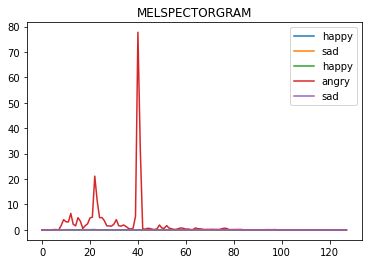

In [116]:
plt.title("MELSPECTORGRAM")
plt.plot(x_train[ran[0]][48:],label=y_train[ran[0]])
plt.plot(x_train[ran[1]][48:],label=y_train[ran[1]])
plt.plot(x_train[ran[2]][48:],label=y_train[ran[2]])
plt.plot(x_train[ran[3]][48:],label=y_train[ran[3]])
plt.plot(x_train[ran[4]][48:],label=y_train[ran[4]])
plt.legend()


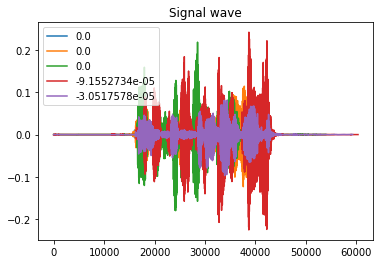

In [121]:
plt.title('Signal wave')
plt.plot(signal_wave[ran[0]],label=signal_wave[ran[0]][1])
plt.plot(signal_wave[ran[1]],label=signal_wave[ran[1]][1])
plt.plot(signal_wave[ran[2]],label=signal_wave[ran[2]][1])
plt.plot(signal_wave[ran[3]],label=signal_wave[ran[3]][1])
plt.plot(signal_wave[ran[4]],label=signal_wave[ran[4]][1])
plt.legend()

In [122]:
len(signal_wave[0])


55522

In [123]:
a=[[1],[2],[3],[4],[5],[6]]
b=[1,4,6,8,10,12]

In [137]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [138]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [139]:
y_pred=model.predict(x_test)

In [140]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.58%


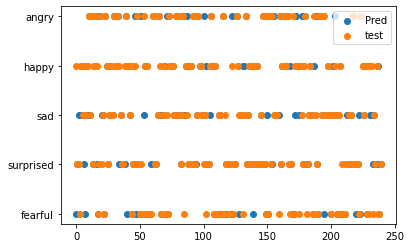

In [128]:
l=[i for i in range(len(y_pred))]
plt.scatter(l,y_pred,label='Pred')
plt.scatter(l,y_test,label='test')
plt.legend()



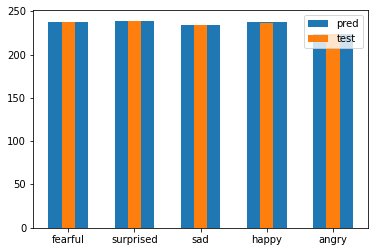

In [129]:
l=[i for i in range(len(y_pred))]
plt.bar(y_pred,l,width=0.6,label="pred")
plt.bar(y_test,l,width=0.2,label="test")
plt.legend()


In [130]:
m=confusion_matrix(y_test,y_pred)
print(m)

[[35  3  1  2  2]
 [ 0 28  5  5  5]
 [ 4  3 36  6  5]
 [ 5  4  3 37  0]
 [ 3  5  1  3 39]]


In [131]:
import heapq

In [132]:
angry=[]
fear=[]
sad=[]
happy=[]
surprise=[]

In [133]:
for i in range(len(y_pred)):
    if([y_pred[i]]=='angry'):
        angry.append(x_test[i])
    if([y_pred[i]]=='sad'):
        sad.append(x_test[i])
    if([y_pred[i]]=='fearful'):
        fear.append(x_test[i])
    if([y_pred[i]]=='happy'):
        happy.append(x_test[i])
    if([y_pred[i]]=='surprised'):
        surprise.append(x_test[i])
    

In [134]:
priorty=[]

for i in range(len(y_pred)):
    heapq.heappush(priorty,(emotionstonumber[y_pred[i]],y_pred[i],i+1))

In [135]:
len(priorty)

240

In [136]:
print(priorty[:50])

[(0, 'fearful', 1), (0, 'fearful', 8), (0, 'fearful', 48), (0, 'fearful', 18), (0, 'fearful', 23), (0, 'fearful', 53), (0, 'fearful', 56), (0, 'fearful', 68), (0, 'fearful', 73), (0, 'fearful', 41), (0, 'fearful', 45), (0, 'fearful', 196), (0, 'fearful', 109), (0, 'fearful', 58), (0, 'fearful', 120), (0, 'fearful', 129), (0, 'fearful', 140), (0, 'fearful', 150), (0, 'fearful', 152), (1, 'angry', 20), (0, 'fearful', 171), (1, 'angry', 11), (0, 'fearful', 187), (1, 'angry', 24), (0, 'fearful', 201), (0, 'fearful', 209), (0, 'fearful', 111), (0, 'fearful', 112), (0, 'fearful', 59), (0, 'fearful', 122), (0, 'fearful', 124), (1, 'angry', 66), (1, 'angry', 134), (1, 'angry', 34), (1, 'angry', 33), (1, 'angry', 72), (1, 'angry', 16), (1, 'angry', 19), (1, 'angry', 79), (1, 'angry', 161), (1, 'angry', 40), (1, 'angry', 85), (0, 'fearful', 172), (1, 'angry', 88), (1, 'angry', 181), (1, 'angry', 47), (0, 'fearful', 191), (1, 'angry', 97), (1, 'angry', 49), (1, 'angry', 101)]
